In [2]:
import time 
import datetime
from sklearn import metrics,cluster,mixture
from matplotlib import pyplot as plt
import numpy as np
import cv2
import seaborn as sns
from preprocessing import *

570

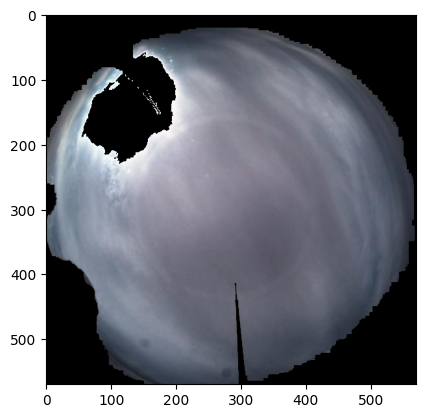

In [3]:
path = r"C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-17\638541802295123622.png"
mask = cv2.imread(r"C:\Users\ASUS\Documents\NARIT_internship_data\Mask_obs\mask_delete_5.png",cv2.IMREAD_GRAYSCALE)
mask = crop_center(mask,crop_size=570)
img = load_single_image(path,mask=mask,apply_crop_sun=True,crop_size=570)[0]
plt.imshow(img[0])
len(img[0])

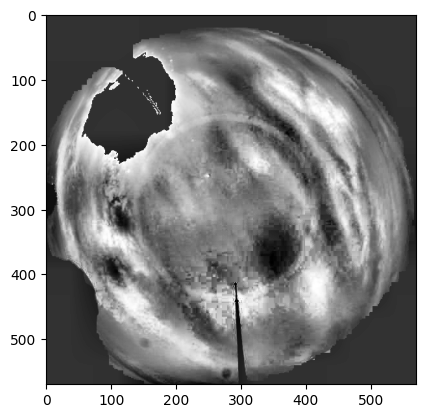

In [4]:
from ClassPrediction import prediction
pred = prediction()
masked= pred.RBsingle(input=img)[0][0]
clahe = cv2.createCLAHE(clipLimit=50, tileGridSize=(8, 8))
masked = clahe.apply(masked)
plt.imshow(masked,cmap='gray')

In [5]:
def Edging(input:list,ker_size:int):
    grad = []
    clahe = cv2.createCLAHE(clipLimit=50, tileGridSize=(8, 8))
    for i in input:
        i = clahe.apply(i)
        gre = ((cv2.Sobel(i, cv2.CV_64F, 0, 1, ksize=ker_size)+cv2.Sobel(i, cv2.CV_64F, 1, 0, ksize=ker_size))/1000)+60
        _,thresh = cv2.threshold(gre,0,255,cv2.THRESH_TOZERO)
        grad.append(cv2.convertScaleAbs(thresh))
    return grad

In [46]:
properties = ['contrast',
            'dissimilarity',
            'homogeneity',
            'energy',
            'correlation',
            'ASM']

mask_path = r'C:\Users\ASUS\Documents\NARIT_internship_data\Mask_obs\mask_delete_5.png'
mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
mask = mask[(int(mask.shape[0]/2)-270):int((mask.shape[0]/2)+270),int((mask.shape[1]/2)-290):int((mask.shape[1]/2)+280)]
path = r"C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-02"
images,filename = load_images_and_preprocess(path,mask=mask,apply_crop_sun=True)
masked,value,RB = RBratio(input=images)
grad = Edging(input=masked,ker_size=7)

In [47]:
glcm = computeGlcm(image=masked,distance=[3],angle=[45])
df = getDataframe(properties,glcm,index=filename,intensity=value,RB=RB)

In [48]:
glcm1 = computeGlcm(image=grad,distance=[3],angle=[45])
df2 = getDataframe(properties,glcm1,index=filename,intensity=value,RB=RB)

78.93686484731346
Cloud percentage : 94.08435554268456 %


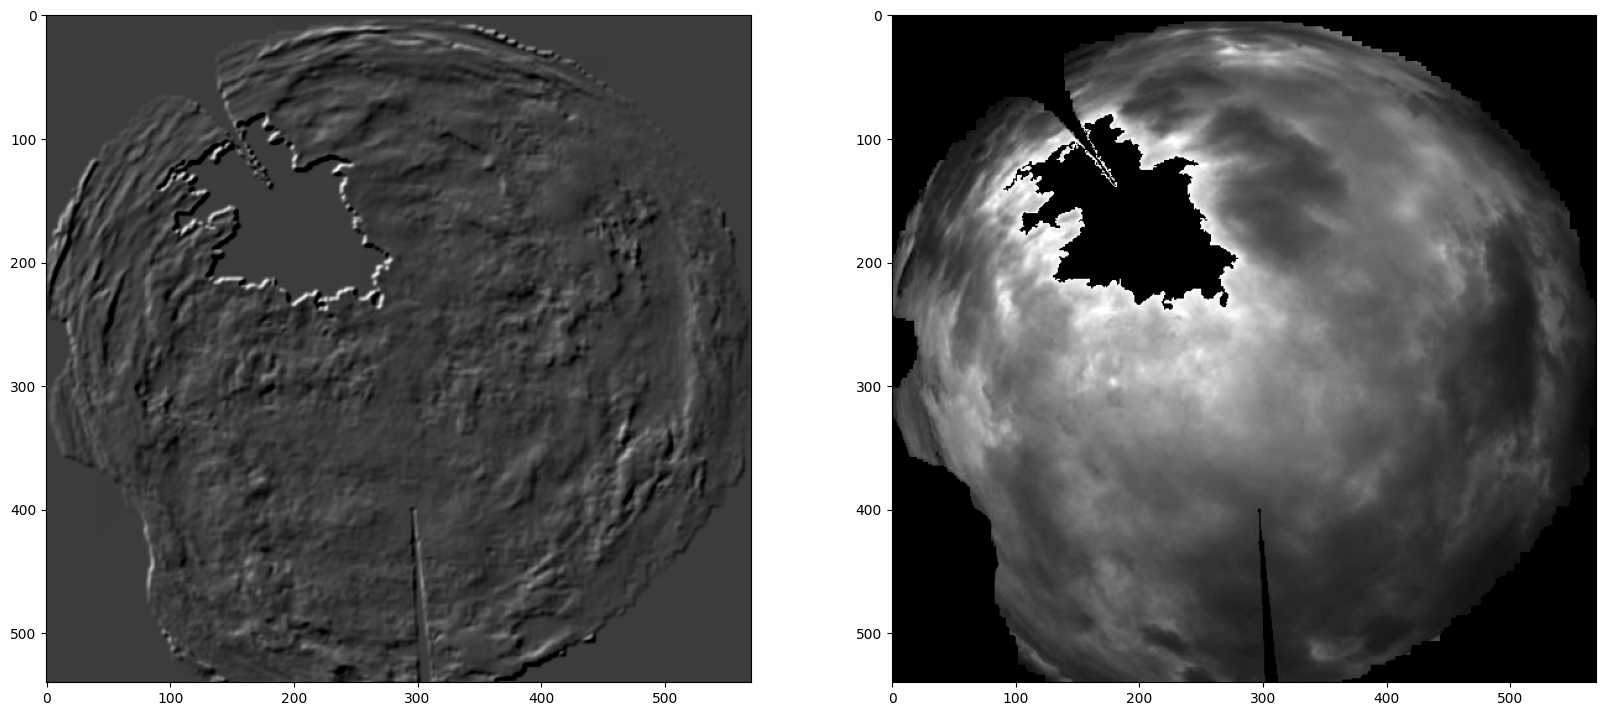

In [49]:
im = 172
print(value[im])
tresh = cv2.convertScaleAbs(grad[im])
print("Cloud percentage :",showCloudRatio(masked,mask=mask,number=im)*100,"%")
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(grad[im],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(masked[im],cmap='gray')

In [50]:
df.to_csv('GLCM_SobelFeature_ALL_sky_2June_dis3_ang45_test.csv')

In [51]:
df = df.loc[df["intensity"] >= 75]

In [52]:
df2 = df2.loc[df2["intensity"] >= 75]

<Axes: xlabel='dissimilarity', ylabel='ASM'>

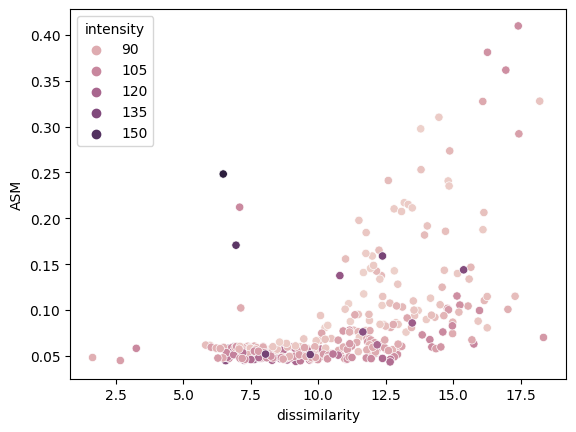

In [53]:
sns.scatterplot(data=df,x=df['dissimilarity'],y=df['ASM'],hue=df['intensity'])

<Axes: xlabel='dissimilarity', ylabel='ASM'>

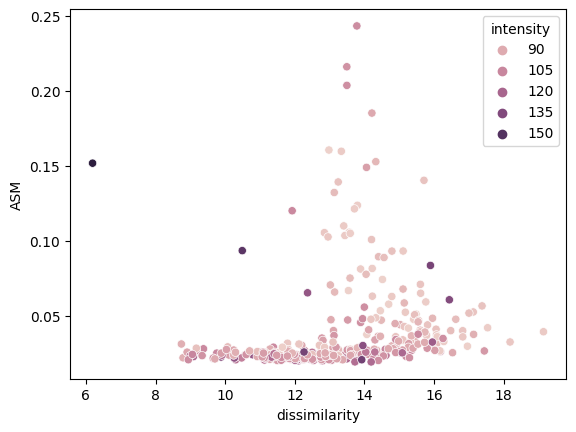

In [54]:
sns.scatterplot(data=df2,x=df2['dissimilarity'],y=df2['ASM'],hue=df2['intensity'])

<Axes: >

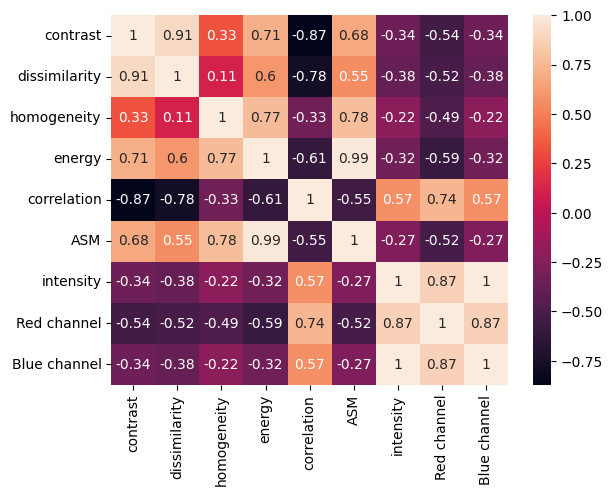

In [55]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

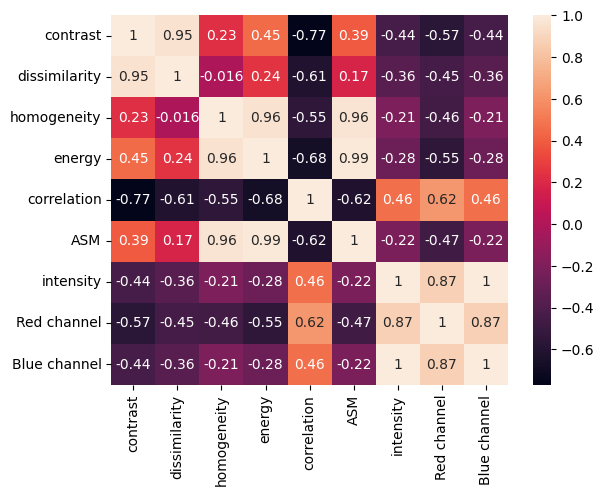

In [56]:
sns.heatmap(df2.corr(),annot=True)